In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import ImageGrid

import os
import glob
import pandas as pd
import json

In [3]:
home = os.path.expanduser("~")
base_path = os.path.join(home, 'tmp')
remote_path = "/cluster/scratch/vogtva/data/bruss/"
def convert_to_local_path(path):
    return os.path.join(base_path, path[len(remote_path):])

In [4]:
def get_db(data_dir):
    json_files = glob.glob(os.path.join(data_dir, "*.json"))
    data_list = []

    # Iterate through the JSON files and read them
    for file in json_files:
        with open(file, 'r') as f:
            data = json.load(f)
            data_list.append(data)
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data_list)
    return df

In [5]:
data_dir = base_path
df0 = get_db(data_dir)

In [6]:
df0

,model,A,B,Nx,dx,Nt,dt,Du,Dv,sigma_ic,random_seed,n_snapshots,filename,run_id
0,bruss,5.0,9.0,200,1.0,20000,0.0025,2.0,22.0,0.1,1,100,/cluster/scratch/vogtva/data/bruss/33b7f552-88...,NaN
1,bruss,3.0,4.8,200,1.0,20000,0.0025,2.0,22.0,0.1,1,100,/cluster/scratch/vogtva/data/bruss/3ceebafb-6d...,NaN
2,bruss,15.0,33.0,200,1.0,20000,0.0025,2.0,22.0,0.1,1,100,/cluster/scratch/vogtva/data/bruss/3686ba63-32...,NaN
3,bruss,3.0,5.4,200,1.0,20000,0.0025,2.0,22.0,0.1,1,100,/cluster/scratch/vogtva/data/bruss/f8f28119-91...,NaN
4,bruss,5.0,9.0,400,0.5,50000,0.0025,1.0,7.0,0.1,1,100,/cluster/scratch/vogtva/data/bruss/af700077-64...,vary_du_dv
5,bruss,5.0,9.0,400,0.5,50000,0.0010,2.5,27.5,0.1,1,100,/cluster/scratch/vogtva/data/bruss/55df9fb7-87...,vary_du_dv
6,bruss,5.0,9.0,400,0.5,50000,0.0025,2.5,32.5,0.1,1,100,/cluster/scratch/vogtva/data/bruss/5d3f0996-a3...,vary_du_dv
7,bruss,5.0,9.0,400,0.5,50000,0.0010,2.0,18.0,0.1,1,100,/cluster/scratch/vogtva/data/bruss/5ee1f1b6-2d...,vary_du_dv
8,bruss,5.0,9.0,400,0.5,50000,0.0010,1.5,16.5,0.1,1,100,/cluster/scratch/vogtva/data/bruss/55885f1c-0d...,vary_du_dv
9,bruss,5.0,9.0,400,0.5,50000,0.0010,1.0,13.0,0.1,1,100,/cluster/scratch/vogtva/data/bruss/e51d7117-bb...,vary_du_dv


In [7]:
df = df0.copy()
df = df[(df['run_id'] == 'vary_du_dv')]
df

,model,A,B,Nx,dx,Nt,dt,Du,Dv,sigma_ic,random_seed,n_snapshots,filename,run_id
4,bruss,5.0,9.0,400,0.5,50000,0.0025,1.0,7.0,0.1,1,100,/cluster/scratch/vogtva/data/bruss/af700077-64...,vary_du_dv
5,bruss,5.0,9.0,400,0.5,50000,0.0010,2.5,27.5,0.1,1,100,/cluster/scratch/vogtva/data/bruss/55df9fb7-87...,vary_du_dv
6,bruss,5.0,9.0,400,0.5,50000,0.0025,2.5,32.5,0.1,1,100,/cluster/scratch/vogtva/data/bruss/5d3f0996-a3...,vary_du_dv
7,bruss,5.0,9.0,400,0.5,50000,0.0010,2.0,18.0,0.1,1,100,/cluster/scratch/vogtva/data/bruss/5ee1f1b6-2d...,vary_du_dv
8,bruss,5.0,9.0,400,0.5,50000,0.0010,1.5,16.5,0.1,1,100,/cluster/scratch/vogtva/data/bruss/55885f1c-0d...,vary_du_dv
9,bruss,5.0,9.0,400,0.5,50000,0.0010,1.0,13.0,0.1,1,100,/cluster/scratch/vogtva/data/bruss/e51d7117-bb...,vary_du_dv
13,bruss,5.0,9.0,400,0.5,50000,0.0025,1.5,19.5,0.1,1,100,/cluster/scratch/vogtva/data/bruss/0b0d64d2-d2...,vary_du_dv
14,bruss,5.0,9.0,400,0.5,50000,0.0010,2.0,22.0,0.1,1,100,/cluster/scratch/vogtva/data/bruss/d7ac6690-bb...,vary_du_dv
15,bruss,5.0,9.0,400,0.5,50000,0.0010,2.0,26.0,0.1,1,100,/cluster/scratch/vogtva/data/bruss/66dbd0ec-65...,vary_du_dv
16,bruss,5.0,9.0,400,0.5,50000,0.0025,2.5,22.5,0.1,1,100,/cluster/scratch/vogtva/data/bruss/21195f74-84...,vary_du_dv


In [8]:
def ab_grid(df, component_idx=0, frame=-1, sigdigits=2, var1="A", var2="B", file="", an=False):

    if len(df) == 0:
        return None

    df = df.sort_values(by=[var1, var2])
    A_count = len(df[var1].unique())
    print(A_count)
    B_count = int(len(df) / A_count)

    fig = plt.figure(figsize=(20, 5))
    grid = ImageGrid(
        fig,
        111,
        nrows_ncols=(A_count, B_count),
        axes_pad=0.4,  # pad between Axes in inch.
    )

    ims = []

    for i, row in df.iterrows():
        ds = nc.Dataset(convert_to_local_path(row["filename"]))
        data = ds.variables["data"][:]
        ims.append((row, data[0, frame, :, component_idx::2]))
    
    for ax, (row, im) in zip(grid, ims):
        ax.set_title(f"{var1}={row[var1]:.{sigdigits}f}\n{var2} = {row[var2]:.{sigdigits}f}", fontsize=10)
        ax.imshow(im, cmap="viridis")
        ax.set_aspect("equal")
        ax.axis("off")
    row = df.iloc[0]
    if frame == -1:
        time = row["dt"] * row["Nt"]
    else:
        time = row["dt"] * frame * row["Nt"] / row["n_snapshots"]
    fig.suptitle(f"GS, Nx={row['Nx']}, dx={row['dx']}, dt={row['dt']}, T={time:.2f}", fontsize=16)
    
    if file != "":
        plt.savefig(file, dpi=300)
    if not an:
        plt.show()
    return grid

In [ ]:
ab_grid(df, 0, frame=-1, sigdigits=3, var1="A", var2="B") #, file='../out/grids/bruss_du_dv.png')

1


In [44]:
def ab_grid(
    df,
    Nt,
    dt=0.0025,
    Nx=400,
    dx=1.0,
    component_idx=0,
    frame=-1,
    sigdigits=2,
    var1="A",
    var2="B",
    file="",
    an=False,
):
    df_filtered = df[
        (df["Nt"] == Nt) & (df["dt"] == dt) & (df["Nx"] == Nx) & (df["dx"] == dx)
    ]
    if len(df_filtered) == 0:
        return None

    df_filtered = df_filtered.sort_values(by=[var1, var2])
    A_count = len(df_filtered[var1].unique())
    B_count = int(len(df) / A_count)
    fig = plt.figure(figsize=(20, 24))
    grid = ImageGrid(
        fig,
        111,
        nrows_ncols=(A_count, B_count),
        axes_pad=0.4,  # pad between Axes in inch.
    )

    ims = []

    for i, row in df_filtered.iterrows():
        ds = nc.Dataset(row["filename"])
        data = ds.variables["data"][:]
        ims.append((row, data[0, frame, :, component_idx::2]))

    for ax, (row, im) in zip(grid, ims):
        ax.set_title(
            f"{var1}={row[var1]:.{sigdigits}f}\n{var2} = {row[var2]:.{sigdigits}f}",
            fontsize=10,
        )
        ax.imshow(im, cmap="viridis")
        ax.set_aspect("equal")
        ax.axis("off")

    if file != "":
        plt.savefig(file, dpi=300)
    if not an:
        plt.show()
    return grid


In [8]:
# df_a = df[df["A"] == 5.0]
# snapshot_grid(df_a, "A")

In [9]:
grid_animator = lambda f: ab_grid(df, 50_000, 0.0025, 400, 0.5, frame=f, var1="Du", var2="Dv", an=True)

KeyboardInterrupt: 

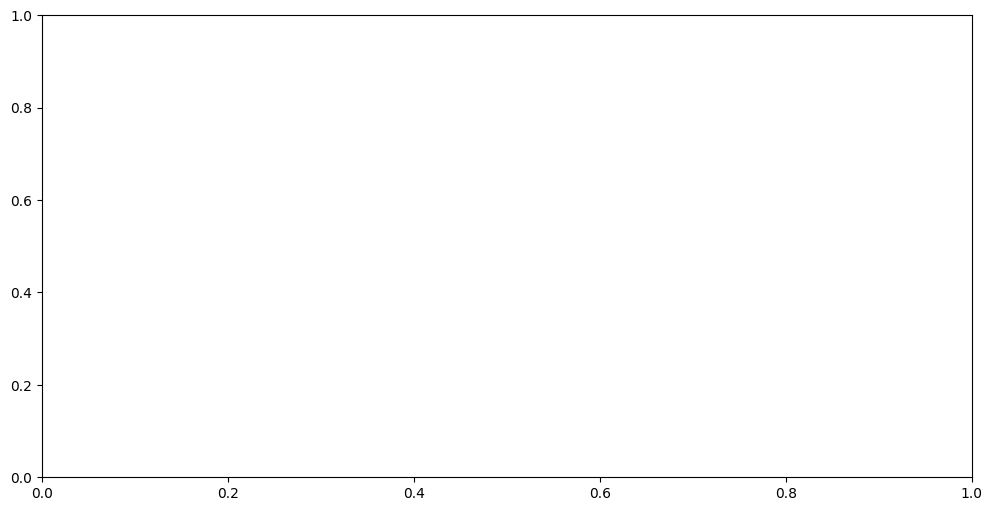

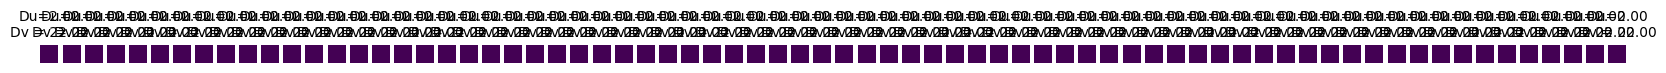

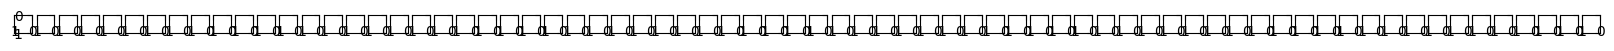

In [10]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
# artists = []
# for i in range(5):
#     artists.append(grid_animator(10 * i))
# ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
# ani.save("an.gif", dpi=150)